In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import pandas as pd
import plotly.express as px
import folium
from folium import plugins
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('data/Infraestructures_Inventari_Reserves.csv')

In [6]:
df.head(5)

,ID_Reserva,Codi_Reserva,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,X_ETRS89,Y_ETRS89,Longitud,Latitud,Numero_Places,Desc_Tipus_Estacionament,Desc_Horari,Long_Estacionament,Data_Alta,Data_Baixa
0,1032249,Altres,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",423932.309,4586738.502,2.089607,41.428610,2.0,Línea,NaN,10.5,1900/12/31,NaN
1,1032374,PMR,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",424989.741,4585260.647,2.102445,41.415399,1.0,NaN,NaN,4.3,2007/08/02,2017/11/23
2,1032418,PMR,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",425159.378,4585005.457,2.104506,41.413117,1.0,NaN,NaN,5.1,1900/12/31,2003/08/01
3,1032419,Càrrega i descàrrega,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",425184.733,4585008.737,2.104809,41.413149,2.0,NaN,Lab. Dill.-Diss. 8-14h i 16-19h,11.4,1900/12/31,2015/02/18
4,1032420,Càrrega i descàrrega,5.0,Sarrià-Sant Gervasi,22.0,"Vallvidrera, el Tibidabo i les Planes",425139.352,4585057.352,2.104260,41.413582,NaN,NaN,NaN,8.2,1900/12/31,2011/11/08


In [7]:
df.tail(5)

,ID_Reserva,Codi_Reserva,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,X_ETRS89,Y_ETRS89,Longitud,Latitud,Numero_Places,Desc_Tipus_Estacionament,Desc_Horari,Long_Estacionament,Data_Alta,Data_Baixa
98701,1457879,Àrea,4.0,Les Corts,20.0,la Maternitat i Sant Ramon,425928.280,4581187.156,2.114172,41.378798,1.0,Línea,8 a 20h,5.8,2023/11/15,NaN
98702,1457881,Àrea,4.0,Les Corts,19.0,les Corts,427976.116,4582091.103,2.138552,41.387126,1.0,Batería,8 a 20h,2.7,2023/11/13,NaN
98703,1457882,Àrea,4.0,Les Corts,19.0,les Corts,427831.240,4581691.438,2.136867,41.383513,3.0,Línea,8 a 20h,14.1,2023/11/13,NaN
98704,1457883,PMR,4.0,Les Corts,19.0,les Corts,427321.227,4581495.096,2.130792,41.381699,1.0,Batería,NaN,3.6,2023/11/13,NaN
98705,1457884,Àrea,4.0,Les Corts,19.0,les Corts,427324.673,4581487.032,2.130834,41.381626,6.0,Batería,8 a 20h,14.1,2023/11/13,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98706 entries, 0 to 98705
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Reserva                98706 non-null  int64  
 1   Codi_Reserva              98706 non-null  object 
 2   Codi_Districte            98665 non-null  float64
 3   Nom_Districte             98665 non-null  object 
 4   Codi_Barri                98665 non-null  float64
 5   Nom_Barri                 98665 non-null  object 
 6   X_ETRS89                  98706 non-null  float64
 7   Y_ETRS89                  98706 non-null  float64
 8   Longitud                  98706 non-null  float64
 9   Latitud                   98706 non-null  float64
 10  Numero_Places             93707 non-null  float64
 11  Desc_Tipus_Estacionament  79209 non-null  object 
 12  Desc_Horari               10812 non-null  object 
 13  Long_Estacionament        98706 non-null  float64
 14  Data_A

In [9]:
df.isnull().sum()

ID_Reserva                      0
Codi_Reserva                    0
Codi_Districte                 41
Nom_Districte                  41
Codi_Barri                     41
Nom_Barri                      41
X_ETRS89                        0
Y_ETRS89                        0
Longitud                        0
Latitud                         0
Numero_Places                4999
Desc_Tipus_Estacionament    19497
Desc_Horari                 87894
Long_Estacionament              0
Data_Alta                       0
Data_Baixa                  47955
dtype: int64

In [10]:
# Dropping rows where district and neighborhood information is missing
df_parking_cleaned = df.dropna(subset=['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'])

In [11]:
# Convert 'Data_Alta' column to datetime type
df_parking_cleaned['Data_Alta'] = pd.to_datetime(df_parking_cleaned['Data_Alta'])

# Excluding placeholder values (year 1900)
df_parking_filtered = df_parking_cleaned[df_parking_cleaned['Data_Alta'].dt.year > 1900]

C:\Users\maldi\AppData\Local\Temp\ipykernel_1336\1078417091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parking_cleaned['Data_Alta'] = pd.to_datetime(df_parking_cleaned['Data_Alta'])


In [13]:
df_parking_filtered['Year'] = df_parking_filtered['Data_Alta'].dt.year

# Excluding the identified outliers (years before 2000)
df_parking_filter_2000_above = df_parking_filtered[df_parking_filtered['Year'] >= 2000]

C:\Users\maldi\AppData\Local\Temp\ipykernel_1336\435992777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parking_filtered['Year'] = df_parking_filtered['Data_Alta'].dt.year


## The following analysis combined the charging station, parking space and tom tom traffic index data

### Charging station data

In [14]:
file_path_locations = 'data/2023_3T_locations_punts_recarrega_mi.json'
df_locations = pd.read_json(file_path_locations)

In [15]:
# Extracting and flattening the nested 'locations' data from the first file
df_locations_expanded = pd.json_normalize(df_locations['locations'])

df_locations_expanded.head(5)

,id,network_brand_name,network_name,access_restriction,stations,onstreet_location,language_code,last_updated,contact.operator_phone,contact.operator_website,...,opening_hours.hour_begin,opening_hours.hour_end,host.name,host.address.address_string,host.address.locality,host.address.postal_code,host.address.country_code,host.address.language_code,host.contact.operator_phone,host.contact.operator_website
0,3715,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11316', 'label': 'MULT_RIUS1', 'coord...",False,CA,2023-07-11T09:15:08+02:00,937 064 866,www.endolla.barcelona,...,00:00,24:00,B:SM Barcelona de Serveis Municipals,"Carrer de Calàbria, 66",Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona
1,3717,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11321', 'label': 'MULT_TORRENT_OLLA1'...",False,CA,2023-07-06T11:00:09+02:00,937 064 866,www.endolla.barcelona,...,00:00,24:00,B:SM Barcelona de Serveis Municipals,"Carrer de Calàbria, 66",Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona
2,3718,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11251', 'label': 'CCL1_MOLL1', 'coord...",False,CA,2023-07-20T12:25:23+02:00,937 064 866,www.endolla.barcelona,...,00:00,24:00,B:SM Barcelona de Serveis Municipals,"Carrer de Calàbria, 66",Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona
3,3719,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11266', 'label': 'GMotos1', 'coordina...",False,CA,2023-07-05T08:35:57+02:00,937 064 866,www.endolla.barcelona,...,00:00,24:00,B:SM Barcelona de Serveis Municipals,"Carrer de Calàbria, 66",Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona
4,3721,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11320', 'label': 'MULT_TANATORI1', 'c...",False,CA,2023-07-14T08:29:35+02:00,937 064 866,www.endolla.barcelona,...,00:00,24:00,B:SM Barcelona de Serveis Municipals,"Carrer de Calàbria, 66",Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona


### Charging station status

In [16]:
file_path_status = 'data/2023_3T_estat_ports_realtime_mi.json'
df_status = pd.read_json(file_path_status)

In [17]:
# Extracting and flattening the nested 'locations' data from the second file
df_status_expanded = pd.json_normalize(df_status['locations'], 'stations', ['id'], 
                                       record_prefix='station_', errors='ignore')

df_status_expanded.head(5)

,station_id,station_ports,id
0,11316,"[{'id': '1', 'port_status': [{'status': 'AVAIL...",3715
1,11317,"[{'id': '1', 'port_status': [{'status': 'IN_US...",3715
2,11321,"[{'id': '1', 'port_status': [{'status': 'AVAIL...",3717
3,11402,"[{'id': '1', 'port_status': [{'status': 'AVAIL...",3717
4,11403,"[{'id': '1', 'port_status': [{'status': 'UNKOW...",3717


### Traffic Index (Tom Tom)

In [18]:
df_traffic = pd.read_csv('data/tomtom_trafic_index.csv')

In [19]:
df_traffic.head(5)

,country,city,date,congestion,diffRatio
0,Argentina,Buenos Aires,2019-12-30,27,0.000000
1,Argentina,Buenos Aires,2019-12-31,10,-0.655172
2,Argentina,Buenos Aires,2020-01-01,6,-0.806452
3,Argentina,Buenos Aires,2020-01-02,18,-0.454545
4,Argentina,Buenos Aires,2020-01-03,21,-0.400000


In [20]:
df_traffic_spain = df_traffic[df_traffic['country'] == 'Spain']
df_traffic_spain.head(5)

,country,city,date,congestion,diffRatio
272940,Spain,A Coruna,2019-12-30,20,0.052632
272941,Spain,A Coruna,2019-12-31,13,-0.277778
272942,Spain,A Coruna,2020-01-01,2,-0.894737
272943,Spain,A Coruna,2020-01-02,19,-0.050000
272944,Spain,A Coruna,2020-01-03,22,0.100000


In [21]:
df_traffic_city_spain = df_traffic_spain.groupby(['city'], as_index=False)['congestion'] \
                .mean() \
                .sort_values(by='congestion', ascending=False)
print(f'The top 5 city with average congestion value are: \n {df_traffic_city_spain.head(5)} ')

The top 5 city with average congestion value are: 
                       city  congestion
15                Pamplona   21.759015
13                  Oviedo   20.234828
2                Barcelona   19.861917
14       Palma de Mallorca   19.702726
17  Santa Cruz de Tenerife   18.682498 


In [22]:
print(f'The least 5 city with average congestion value are: \n {df_traffic_city_spain.tail(5)} ')

The least 5 city with average congestion value are: 
           city  congestion
22        Vigo   12.624450
21  Valladolid   11.889182
5    Cartagena   11.796834
6      Cordoba   10.716799
4        Cadiz    8.644679 


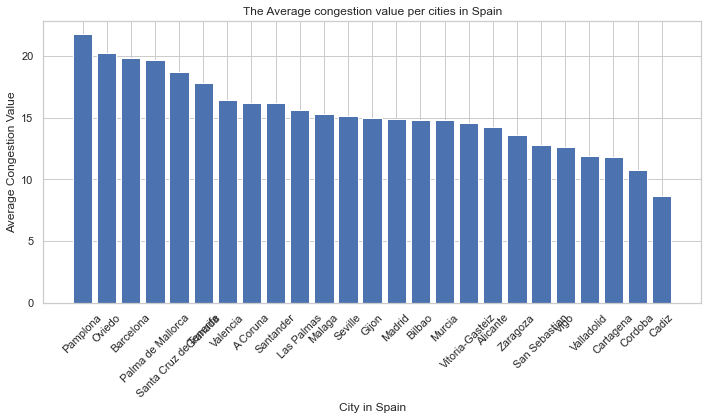

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(df_traffic_city_spain['city'], df_traffic_city_spain['congestion'])
plt.xlabel('City in Spain')
plt.ylabel('Average Congestion Value')
plt.title('The Average congestion value per cities in Spain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Attempting a different method to correctly extract the port status with the associated station_id and location id
def expand_ports(row):
    expanded_rows = []
    for port in row['station_ports']:
        for status in port['port_status']:
            expanded_rows.append({
                'station_id': row['station_id'],
                'location_id': row['id'],
                'port_id': port['id'],
                'status': status['status']
            })
    return expanded_rows

# Applying the function to each row and concatenating the results
expanded_port_status = pd.concat([pd.DataFrame(expand_ports(row)) for _, row in df_status_expanded.iterrows()], ignore_index=True)

expanded_port_status.head()

,station_id,location_id,port_id,status
0,11316,3715,1,AVAILABLE
1,11316,3715,2,AVAILABLE
2,11316,3715,3,AVAILABLE
3,11316,3715,4,AVAILABLE
4,11316,3715,5,AVAILABLE


In [25]:
# Merging the location details with the port status information
merged_data = pd.merge(df_locations_expanded, expanded_port_status, left_on='id', right_on='location_id', how='left')

merged_data.head()

,id,network_brand_name,network_name,access_restriction,stations,onstreet_location,language_code,last_updated,contact.operator_phone,contact.operator_website,...,host.address.locality,host.address.postal_code,host.address.country_code,host.address.language_code,host.contact.operator_phone,host.contact.operator_website,station_id,location_id,port_id,status
0,3715,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11316', 'label': 'MULT_RIUS1', 'coord...",False,CA,2023-07-11T09:15:08+02:00,937 064 866,www.endolla.barcelona,...,Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona,11316,3715,1,AVAILABLE
1,3715,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11316', 'label': 'MULT_RIUS1', 'coord...",False,CA,2023-07-11T09:15:08+02:00,937 064 866,www.endolla.barcelona,...,Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona,11316,3715,2,AVAILABLE
2,3715,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11316', 'label': 'MULT_RIUS1', 'coord...",False,CA,2023-07-11T09:15:08+02:00,937 064 866,www.endolla.barcelona,...,Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona,11316,3715,3,AVAILABLE
3,3715,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11316', 'label': 'MULT_RIUS1', 'coord...",False,CA,2023-07-11T09:15:08+02:00,937 064 866,www.endolla.barcelona,...,Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona,11316,3715,4,AVAILABLE
4,3715,Endolla Barcelona,Barcelona de Serveis Municipals S.A.,PUBLIC,"[{'id': '11316', 'label': 'MULT_RIUS1', 'coord...",False,CA,2023-07-11T09:15:08+02:00,937 064 866,www.endolla.barcelona,...,Barcelona,08015,ES,CA,937 064 866,www.endolla.barcelona,11316,3715,5,AVAILABLE


#### Correlate the parking data with the traffic data (Barcelona)

In [26]:
# Filtering the df_traffic dataset for entries related to Barcelona
df_traffic_barcelona = df_traffic[df_traffic['city'] == 'Barcelona']

# Converting 'date' column to datetime format
df_traffic_barcelona['date'] = pd.to_datetime(df_traffic_barcelona['date'], errors='coerce')

# Displaying the first few rows of the Barcelona traffic dataset
df_traffic_barcelona.head()

C:\Users\maldi\AppData\Local\Temp\ipykernel_152140\1847319519.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffic_barcelona['date'] = pd.to_datetime(df_traffic_barcelona['date'], errors='coerce')


,country,city,date,congestion,diffRatio
275214,Spain,Barcelona,2019-12-30,21,-0.250000
275215,Spain,Barcelona,2019-12-31,15,-0.500000
275216,Spain,Barcelona,2020-01-01,7,-0.774194
275217,Spain,Barcelona,2020-01-02,21,-0.322581
275218,Spain,Barcelona,2020-01-03,20,-0.375000


C:\Users\maldi\AppData\Local\Temp\ipykernel_152140\1944026569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffic_barcelona['year'] = df_traffic_barcelona['date'].dt.year


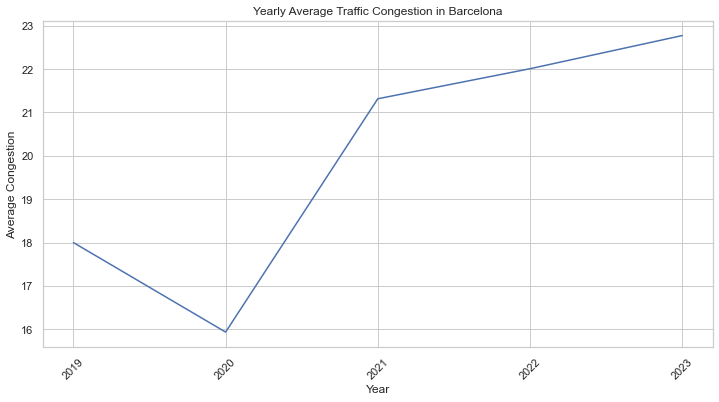

In [27]:
# Aggregating congestion data by year
df_traffic_barcelona['year'] = df_traffic_barcelona['date'].dt.year
traffic_yearly_avg = df_traffic_barcelona.groupby('year')['congestion'].mean()
years = traffic_yearly_avg.index.astype(int) 

# Plotting the yearly trend in traffic congestion
plt.figure(figsize=(12, 6))
traffic_yearly_avg.plot(kind='line')
plt.title('Yearly Average Traffic Congestion in Barcelona')
plt.xlabel('Year')
plt.ylabel('Average Congestion')
plt.xticks(years)  # Imposta gli anni come etichette sull'asse x
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

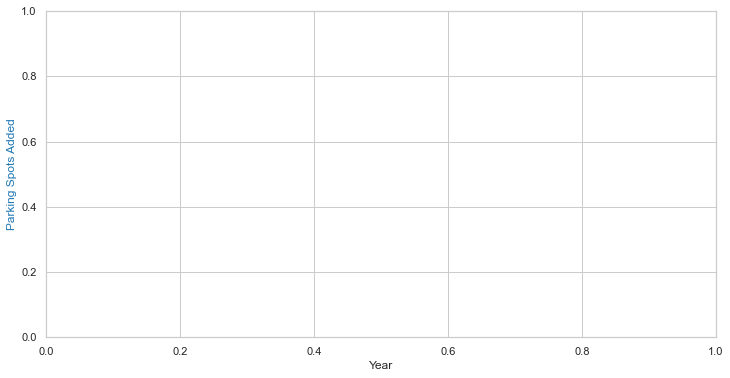

In [30]:
# Aggregating parking data by year (excluding outliers)
# Recall: we've already extracted the 'Year' column in df_parking_recent
parking_yearly_counts = df_parking_filter_2000_above.groupby('Year')['ID_Reserva'].count()

# Merging the yearly parking data with the yearly traffic congestion data
yearly_data_combined = pd.concat([parking_yearly_counts, traffic_yearly_avg], axis=1)
yearly_data_combined.columns = ['Parking_Spots_Added', 'Average_Congestion']

# Calculating correlation
correlation = yearly_data_combined.corr()

# Plotting the combined data for visual comparison
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting parking data
ax1.set_xlabel('Year')
ax1.set_ylabel('Parking Spots Added', color='tab:blue')
ax1.plot(yearly_data_combined.index, yearly_data_combined['Parking_Spots_Added'], color='tab:blue')

ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for traffic data
ax2 = ax1.twinx()
ax2.set_ylabel('Average Traffic Congestion', color='tab:red')
ax2.plot(yearly_data_combined.index, yearly_data_combined['Average_Congestion'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Comparison of Yearly Parking Spots Added and Average Traffic Congestion')
plt.show()

correlation

"""The chart and correlation table provide a comparative view of the yearly addition of parking spots and the average traffic congestion in Barcelona:

Chart Observations:
Blue Line (Left Y-Axis): Represents the number of parking spots added each year.
Red Line (Right Y-Axis): Shows the average traffic congestion for each year.
Visual Trend Analysis: By looking at the two lines, you can visually inspect how changes in the number of parking spots might relate to changes in traffic congestion.

Correlation Analysis:
Correlation Coefficient: The correlation between the number of parking spots added and the average traffic congestion is approximately -0.414.
Interpretation: This negative correlation suggests that as more parking spots are added, there tends to be a decrease in traffic congestion. However, the correlation is not very strong, indicating that other factors are also likely influencing traffic congestion.
The problem is, covid was in 2020"""

"""Given the city-level traffic data and the need to approximate traffic congestion by district, we can adopt a two-pronged approach:

Correlate City-Level Traffic Data with District-Level Parking Data: We'll use the city-wide average congestion data from df_traffic and correlate it with the district-level parking data from df_parking. This will provide a broad understanding of how overall traffic congestion in Barcelona might relate to parking availability in different districts.

Approximate Traffic Congestion by District: We can approximate district-level traffic congestion by considering factors such as the proximity of districts to major roads or city centers, known traffic hotspots, or other urban characteristics that might influence congestion. This approximation will be more qualitative and based on urban geography and traffic flow principles.
"""

### Test Simple Base Model 

In [14]:
# Categorizing missing 'Desc_Tipus_Estacionament' as 'Unknown'
#Desc_Tipus_Estacionament --> It is a description of the specific type of parking reserved (for example, for disabled people, for loading and unloading, etc.).
df_parking_filter_2000_above['Desc_Tipus_Estacionament'].fillna('Unknown', inplace=True)

C:\Users\maldi\AppData\Local\Temp\ipykernel_1336\2495006987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parking_filter_2000_above['Desc_Tipus_Estacionament'].fillna('Unknown', inplace=True)


In [15]:
# Filling missing 'Numero_Places' with the median value
#Numero_Places --> Indicates the total number of parking spaces available in the reserved parking area.
median_places = df_parking_filter_2000_above['Numero_Places'].median()
df_parking_filter_2000_above['Numero_Places'].fillna(median_places, inplace=True)

C:\Users\maldi\AppData\Local\Temp\ipykernel_1336\2012877059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parking_filter_2000_above['Numero_Places'].fillna(median_places, inplace=True)


In [16]:
# Assuming missing 'Data_Baixa' means the parking spot is still active and filling with 'Still Active'
#Date_Baixa --> Date on which the reserved parking area was deactivated or removed.
df_parking_filter_2000_above['Data_Baixa'].fillna('Still Active', inplace=True)

C:\Users\maldi\AppData\Local\Temp\ipykernel_1336\3137324165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parking_filter_2000_above['Data_Baixa'].fillna('Still Active', inplace=True)


In [20]:
# Categorizing missing 'Desc_Horari' as 'Not Specified'
#Desc_Horari --> Provides details on the time when the reserved parking area is active or on specific time constraints.
df_parking_cleaned['Desc_Horari'].fillna('Not Specified', inplace=True)

C:\Users\maldi\AppData\Local\Temp\ipykernel_1336\1257824631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parking_cleaned['Desc_Horari'].fillna('Not Specified', inplace=True)


In [21]:
numeric_cols = df_parking_filter_2000_above.select_dtypes(include=np.number)
correlation = numeric_cols.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'ID_Reserva'),
  Text(0, 1.5, 'Codi_Districte'),
  Text(0, 2.5, 'Codi_Barri'),
  Text(0, 3.5, 'X_ETRS89'),
  Text(0, 4.5, 'Y_ETRS89'),
  Text(0, 5.5, 'Longitud'),
  Text(0, 6.5, 'Latitud'),
  Text(0, 7.5, 'Numero_Places'),
  Text(0, 8.5, 'Long_Estacionament'),
  Text(0, 9.5, 'Year')])

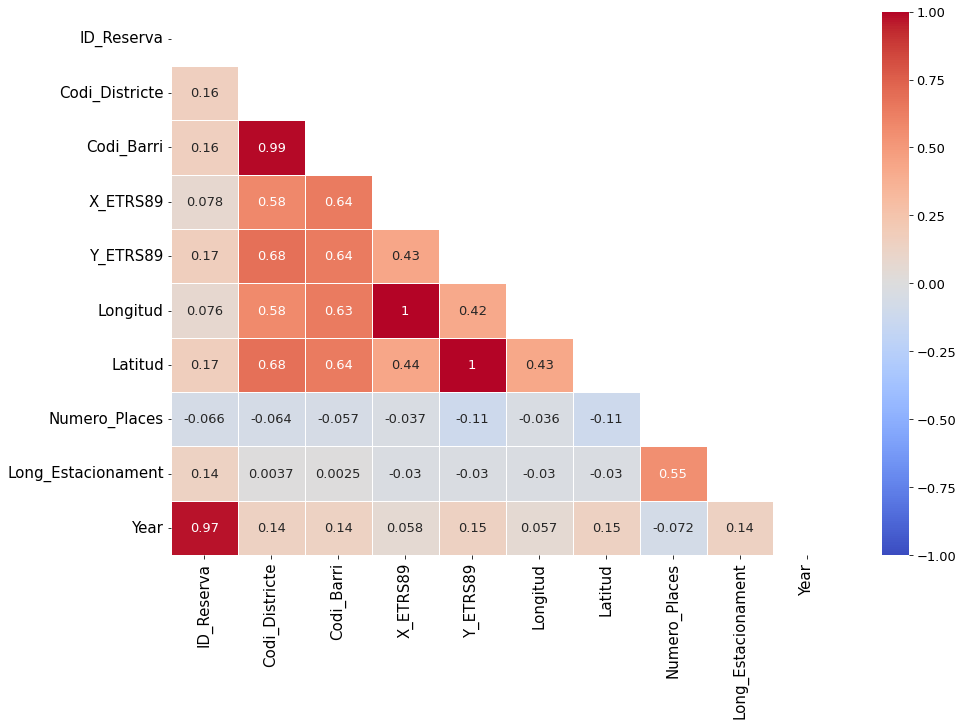

In [22]:
upp_mat=np.triu(correlation) 
plt.figure(figsize=(15,10))
ax=sns.heatmap(correlation, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat, annot_kws={'fontsize': 13}, linewidths=.5)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [23]:
#Select the columns for the model
df_parking_filtered_data = df_parking_filter_2000_above.copy()
df_parking_filtered_data = df_parking_filtered_data[['Numero_Places', 'Nom_Districte', 'Nom_Barri', 'Long_Estacionament', 'Desc_Tipus_Estacionament']]
df_parking_filtered_data

,Numero_Places,Nom_Districte,Nom_Barri,Long_Estacionament,Desc_Tipus_Estacionament
1,1.0,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",4.3,Unknown
6,1.0,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",4.8,Unknown
7,1.0,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",5.1,Unknown
8,1.0,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",5.0,Línea
9,10.0,Sarrià-Sant Gervasi,Sarrià,7.0,Unknown
...,...,...,...,...,...
98701,1.0,Les Corts,la Maternitat i Sant Ramon,5.8,Línea
98702,1.0,Les Corts,les Corts,2.7,Batería
98703,3.0,Les Corts,les Corts,14.1,Línea
98704,1.0,Les Corts,les Corts,3.6,Batería


In [24]:
# Create the dummy variable number of district and neighbourhood
tutto_dummies = pd.get_dummies(df_parking_filtered_data)
tutto_dummies

,Numero_Places,Long_Estacionament,Nom_Districte_Ciutat Vella,Nom_Districte_Eixample,Nom_Districte_Gràcia,Nom_Districte_Horta-Guinardó,Nom_Districte_Les Corts,Nom_Districte_Nou Barris,Nom_Districte_Sant Andreu,Nom_Districte_Sant Martí,...,Nom_Barri_les Corts,Nom_Barri_les Roquetes,Nom_Barri_les Tres Torres,Desc_Tipus_Estacionament_Alternativa,Desc_Tipus_Estacionament_Altres,Desc_Tipus_Estacionament_Batería,Desc_Tipus_Estacionament_Chaflán,Desc_Tipus_Estacionament_Línea,Desc_Tipus_Estacionament_Parrilla,Desc_Tipus_Estacionament_Unknown
1,1.0,4.3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,1.0,4.8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,1.0,5.1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,1.0,5.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,10.0,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98701,1.0,5.8,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
98702,1.0,2.7,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
98703,3.0,14.1,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
98704,1.0,3.6,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False


"""
Nom_Districte: It is the name of the district in which the reserved parking area is located.

Nom_Barri: It is the name of the neighborhood in which the reserved parking area is located.

Long_Estacionament: Length of the reserved parking area.
"""

In [25]:
tutto_dummies = tutto_dummies[["Long_Estacionament", "Nom_Districte_Ciutat Vella", "Nom_Districte_Eixample",
"Nom_Districte_Gràcia", "Nom_Districte_Horta-Guinardó", "Nom_Districte_Les Corts",
"Nom_Districte_Nou Barris", "Nom_Districte_Sant Andreu", "Nom_Districte_Sant Martí",
"Nom_Districte_Sants-Montjuïc", "Nom_Districte_Sarrià-Sant Gervasi", "Nom_Barri_Baró de Viver",
"Nom_Barri_Can Baró", "Nom_Barri_Can Peguera", "Nom_Barri_Canyelles",
"Nom_Barri_Ciutat Meridiana", "Nom_Barri_Diagonal Mar i el Front Marítim del Poblenou",
"Nom_Barri_Horta", "Nom_Barri_Hostafrancs", "Nom_Barri_Montbau",
"Nom_Barri_Navas", "Nom_Barri_Pedralbes", "Nom_Barri_Porta",
"Nom_Barri_Provençals del Poblenou", "Nom_Barri_Sant Andreu", "Nom_Barri_Sant Antoni",
"Nom_Barri_Sant Genís dels Agudells", "Nom_Barri_Sant Gervasi-Galvany",
"Nom_Barri_Sant Gervasi-la Bonanova", "Nom_Barri_Sant Martí­ de Provençals",
"Nom_Barri_Sant Pere, Santa Caterina i la Ribera", "Nom_Barri_Sants",
"Nom_Barri_Sants-Badal", "Nom_Barri_Sarrià", "Nom_Barri_Torre Baró",
"Nom_Barri_Vallbona", "Nom_Barri_Vallcarca i els Penitents",
"Nom_Barri_Vallvidrera, el Tibidabo i les Planes", "Nom_Barri_Verdun",
"Nom_Barri_Vilapicina i la Torre Llobeta", "Nom_Barri_el Baix Guinardó",
"Nom_Barri_el Barri Gòtic", "Nom_Barri_el Besòs i el Maresme",
"Nom_Barri_el Bon Pastor", "Nom_Barri_el Camp d'en Grassot i Gràcia Nova",
"Nom_Barri_el Camp de l'Arpa del Clot", "Nom_Barri_el Carmel",
"Nom_Barri_el Clot", "Nom_Barri_el Coll", "Nom_Barri_el Congrés i els Indians",
"Nom_Barri_el Fort Pienc", "Nom_Barri_el Guinardó", "Nom_Barri_el Parc i la Llacuna del Poblenou",
"Nom_Barri_el Poble Sec", "Nom_Barri_el Poblenou", "Nom_Barri_el Putxet i el Farró",
"Nom_Barri_el Raval", "Nom_Barri_el Turó de la Peira",
"Nom_Barri_l'Antiga Esquerra de l'Eixample", "Nom_Barri_la Barceloneta",
"Nom_Barri_la Bordeta", "Nom_Barri_la Clota",
"Nom_Barri_la Dreta de l'Eixample", "Nom_Barri_la Font d'en Fargues",
"Nom_Barri_la Font de la Guatlla", "Nom_Barri_la Guineueta",
"Nom_Barri_la Marina de Port", "Nom_Barri_la Marina del Prat Vermell",
"Nom_Barri_la Maternitat i Sant Ramon",
"Nom_Barri_la Nova Esquerra de l'Eixample", "Nom_Barri_la Prosperitat",
"Nom_Barri_la Sagrada Família", "Nom_Barri_la Sagrera",
"Nom_Barri_la Salut", "Nom_Barri_la Teixonera",
"Nom_Barri_la Trinitat Nova", "Nom_Barri_la Trinitat Vella",
"Nom_Barri_la Vall d'Hebron", "Nom_Barri_la Verneda i la Pau",
"Nom_Barri_la Vila Olímpica del Poblenou", "Nom_Barri_la Vila de Gràcia",
"Nom_Barri_les Corts", "Nom_Barri_les Roquetes", "Nom_Barri_les Tres Torres", 
"Desc_Tipus_Estacionament_Alternativa", "Desc_Tipus_Estacionament_Altres", 
"Desc_Tipus_Estacionament_Batería", "Desc_Tipus_Estacionament_Chaflán", 
"Desc_Tipus_Estacionament_Línea", "Desc_Tipus_Estacionament_Parrilla",
"Desc_Tipus_Estacionament_Unknown", "Numero_Places"
]]
tutto_dummies

,Long_Estacionament,Nom_Districte_Ciutat Vella,Nom_Districte_Eixample,Nom_Districte_Gràcia,Nom_Districte_Horta-Guinardó,Nom_Districte_Les Corts,Nom_Districte_Nou Barris,Nom_Districte_Sant Andreu,Nom_Districte_Sant Martí,Nom_Districte_Sants-Montjuïc,...,Nom_Barri_les Roquetes,Nom_Barri_les Tres Torres,Desc_Tipus_Estacionament_Alternativa,Desc_Tipus_Estacionament_Altres,Desc_Tipus_Estacionament_Batería,Desc_Tipus_Estacionament_Chaflán,Desc_Tipus_Estacionament_Línea,Desc_Tipus_Estacionament_Parrilla,Desc_Tipus_Estacionament_Unknown,Numero_Places
1,4.3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.0
6,4.8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.0
7,5.1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1.0
8,5.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1.0
9,7.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98701,5.8,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1.0
98702,2.7,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1.0
98703,14.1,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,3.0
98704,3.6,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1.0


In [26]:
tutto_dummies=tutto_dummies.to_numpy()
tutto_dummies.shape

(92853, 92)

In [27]:
ix = range(0,91)
iy = 91
X = tutto_dummies[:,ix]
Y = tutto_dummies[:,iy]

In [28]:
##### The training dataset is 67% of the data and the test size is 33 %

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=0)
print("Dimensions of X_train: " + str(X_train.shape))
print("Dimensions of Y_train: " + str(Y_train.shape))
print("Dimensions of X_test: " + str(X_test.shape))
print("Dimensions of Y_test: " + str(Y_test.shape))

Dimensions of X_train: (62211, 91)
Dimensions of Y_train: (62211,)
Dimensions of X_test: (30642, 91)
Dimensions of Y_test: (30642,)


In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
scalerX = preprocessing.MinMaxScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Performance evaluation
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 16.042506580291782
R-squared (R2): 0.46199268530251114


In [32]:
from sklearn.ensemble import RandomForestRegressor  

# creation of Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42) 

# Model Training
model.fit(X_train, Y_train)

# Prediction and test
predictions = model.predict(X_test)

In [33]:
# Performance evaluation
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 13.074387692379583
R-squared (R2): 0.5615325960138642


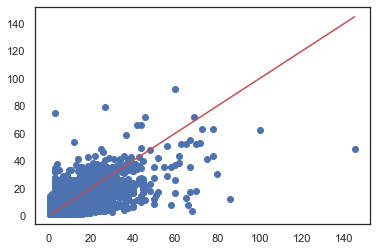

In [34]:
#Scatter plot of prediction and test
sns.set_theme(style="white")
fig, ax = plt.subplots()
ax.plot(Y_test,predictions,'bo')
ax.plot([np.min(Y_test),np.max(Y_test)],[np.min(Y_test),np.max(Y_test)],'r')